# Week 24: Natural Language Processing

## TABLE OF CONTENTS

- [Week 24: Natural Language Processing](#Week-24:-Natural-Language-Processing)
- [1. Demo: Using TextBlob](#1.-Demo:-Using-TextBlob)
  - [1.1 Installation & Import Package](#1.1-Installation-&-Import-Package)
  - [1.2 Understanding The blob object](#1.2-Understanding-The-blob-object)
    - [Example 1](#Example-1)
    - [Example 2](#Example-2)
  - [1.3 Part of Speech Tagging](#1.3-Part-of-Speech-Tagging)
  - [1.4 Noun Phrases Extraction](#1.4-Noun-Phrases-Extraction)
- [1.5 Sentiment Analysis](#1.5-Sentiment-Analysis)
  - [1.6 Other Use Methods](#1.6-Other-Use-Methods)
    - [1.6.1 Look-up for Definitions](#1.6.1-Look-up-for-Definitions)
    - [1.6.2 Look-up for similar terms](#1.6.2-Look-up-for-similar-terms)
    - [1.6.3 Spelling Correction](#1.6.3-Spelling-Correction)
    - [1.6.4 Language Detection (Optional)](#1.6.4-Language-Detection-(Optional))
- [2. Weekly Tasks](#2.-Weekly-Tasks)
  - [2.1 Loading the Data](#2.1-Loading-the-Data)
  - [2.2 Creating the "blob" object for subsequent text analysis](#2.2-Creating-the-"blob"-object-for-subsequent-text-analysis)
  - [2.3 Understand the Texts - Exploratory Data Analysis](#2.3-Understand-the-Texts---Exploratory-Data-Analysis)
  - [2.4 Sentiment Analysis](#2.4-Sentiment-Analysis)
  - [2.5 Extracting Features for Descriptive Analysis](#2.5-Extracting-Features-for-Descriptive-Analysis)
  - [2.6 Text Classification](#2.6-Text-Classification)
    - [2.6.1 Preparing the Data for Classification](#2.6.1-Preparing-the-Data-for-Classification)
    - [2.6.2 Train the Classification Model using Scikit-Learn](#2.6.2-Train-the-Classification-Model-using-Scikit-Learn)
    - [2.6.3 Extra Contents: Train the Classification Model using TextBlob](#2.6.3-Extra-Contents:-Train-the-Classification-Model-using-TextBlob)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Settings for Matplotlib (& Seaborn)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import libraries for charting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #<- NEW

# Set the size of charts
plt.rc('figure', figsize=(16,9))
plt.style.use('fivethirtyeight')
sns.set_context(context={'figure.figsize': (16,9)})

In [3]:
# You might need to install ntlk package
!pip install nltk
import nltk
nltk.download('omw-1.4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# 1. Demo: Using TextBlob

## 1.1 Installation & Import Package

In [4]:
!pip install textblob
!python -m textblob.download_corpora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [5]:
from textblob import TextBlob

## 1.2 Understanding The blob object 

### Example 1

In [6]:
# Example 1
text = 'Data Champions bootcamp is a 6-month training course'

blob = TextBlob(text)

In [7]:
# blob has access to many "string" methods, just like Python string object
print(blob.lower())

print(blob.title())

print(blob.starts_with("Data"))

data champions bootcamp is a 6-month training course
Data Champions Bootcamp Is A 6-Month Training Course
True


### Example 2

In [8]:
# Example 2

text = "In DC Bootcamp, high-quality e-learning courses are coupled with practical workshops conducted by trainers.\
    Participants will have access to additional learning materials, hands-on tasks, templates,\
    and expose to tools that are contextualized. \
    Officers will learn alongside with a community of like-minded officers and have great opportunity to exchange ideas."

blob = TextBlob(text)

In [9]:
# WordList object works like Python's list object. They share similar methods and are iterable.
blob.words

WordList(['In', 'DC', 'Bootcamp', 'high-quality', 'e-learning', 'courses', 'are', 'coupled', 'with', 'practical', 'workshops', 'conducted', 'by', 'trainers', 'Participants', 'will', 'have', 'access', 'to', 'additional', 'learning', 'materials', 'hands-on', 'tasks', 'templates', 'and', 'expose', 'to', 'tools', 'that', 'are', 'contextualized', 'Officers', 'will', 'learn', 'alongside', 'with', 'a', 'community', 'of', 'like-minded', 'officers', 'and', 'have', 'great', 'opportunity', 'to', 'exchange', 'ideas'])

In [10]:
# sentences produces a list of "Sentence" objects. They behave similar to "Word" object in TextBlob
# and share similar methods
blob.sentences

[Sentence("In DC Bootcamp, high-quality e-learning courses are coupled with practical workshops conducted by trainers."),
 Sentence("Participants will have access to additional learning materials, hands-on tasks, templates,    and expose to tools that are contextualized."),
 Sentence("Officers will learn alongside with a community of like-minded officers and have great opportunity to exchange ideas.")]

In [11]:
for sentence in blob.sentences:
    print(sentence.string)
    print("\n") #next line

In DC Bootcamp, high-quality e-learning courses are coupled with practical workshops conducted by trainers.


Participants will have access to additional learning materials, hands-on tasks, templates,    and expose to tools that are contextualized.


Officers will learn alongside with a community of like-minded officers and have great opportunity to exchange ideas.




## 1.3 Part of Speech Tagging

In [12]:
text = 'Data Champions bootcamp is a 6-month training course'

blob = TextBlob(text)
blob.pos_tags

[('Data', 'NNP'),
 ('Champions', 'NNP'),
 ('bootcamp', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('6-month', 'JJ'),
 ('training', 'NN'),
 ('course', 'NN')]

## 1.4 Noun Phrases Extraction

In [13]:
blob.noun_phrases

WordList(['data champions', '6-month training course'])

# 1.5 Sentiment Analysis

In [14]:

text = "This service is amazingly simple to use. Great to know this!"

blob = TextBlob(text)
blob.sentiment

Sentiment(polarity=0.5, subjectivity=0.5535714285714286)

In [15]:
print("Polarity = ", blob.sentiment.polarity)

Polarity =  0.5


## 1.6 Other Use Methods

### 1.6.1 Look-up for Definitions

In [16]:
from textblob import Word

myword = Word("citizen")
myword.definitions

['a native or naturalized member of a state or other political community']

### 1.6.2 Look-up for similar terms

In [17]:
myword = Word("upset")
from textblob.wordnet import ADJ
myword.definitions

synonyms = set()
for synset in myword.get_synsets(pos=ADJ):
    for lemma in synset.lemmas():
        synonyms.add(lemma.name())
        
print(synonyms)

{'broken', 'worried', 'upturned', 'upset', 'disordered', 'distressed', 'disturbed', 'disquieted', 'confused', 'overturned'}


### 1.6.3 Spelling Correction

In [18]:
text = "I tink the analysis is goood"

blob = TextBlob(text)
blob.correct()

TextBlob("I think the analysis is good")

### 1.6.4 Language Detection (Optional)

In [19]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 7.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=bc365e6305d6b22cec72022ca969488abd794745ae5c705986e8d94b04c642c8
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [20]:
from langdetect import detect

text = "I tink the analysis is goood"
detect(text)

'en'

---

---

# 2. Weekly Tasks 

## 2.1 Loading the Data

We will use the same dataset [Yelp Reviews](https://www.kaggle.com/c/yelp-recsys-2013) from the Udemy course.

- Each observation in this dataset is a review of a particular business by a particular user.

- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

- The "cool" column is the number of "cool" votes this review received from other Yelp users. 

- All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

- The "useful" and "funny" columns are similar to the "cool" column.

In [23]:
link = "https://raw.githubusercontent.com/Benjamin-Aw-93/random/main/yelp.csv"

df = pd.read_csv(link)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [25]:
df.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [26]:
df.groupby('business_id').size().describe()

count    4174.000000
mean        2.395783
std         2.935776
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        37.000000
dtype: float64

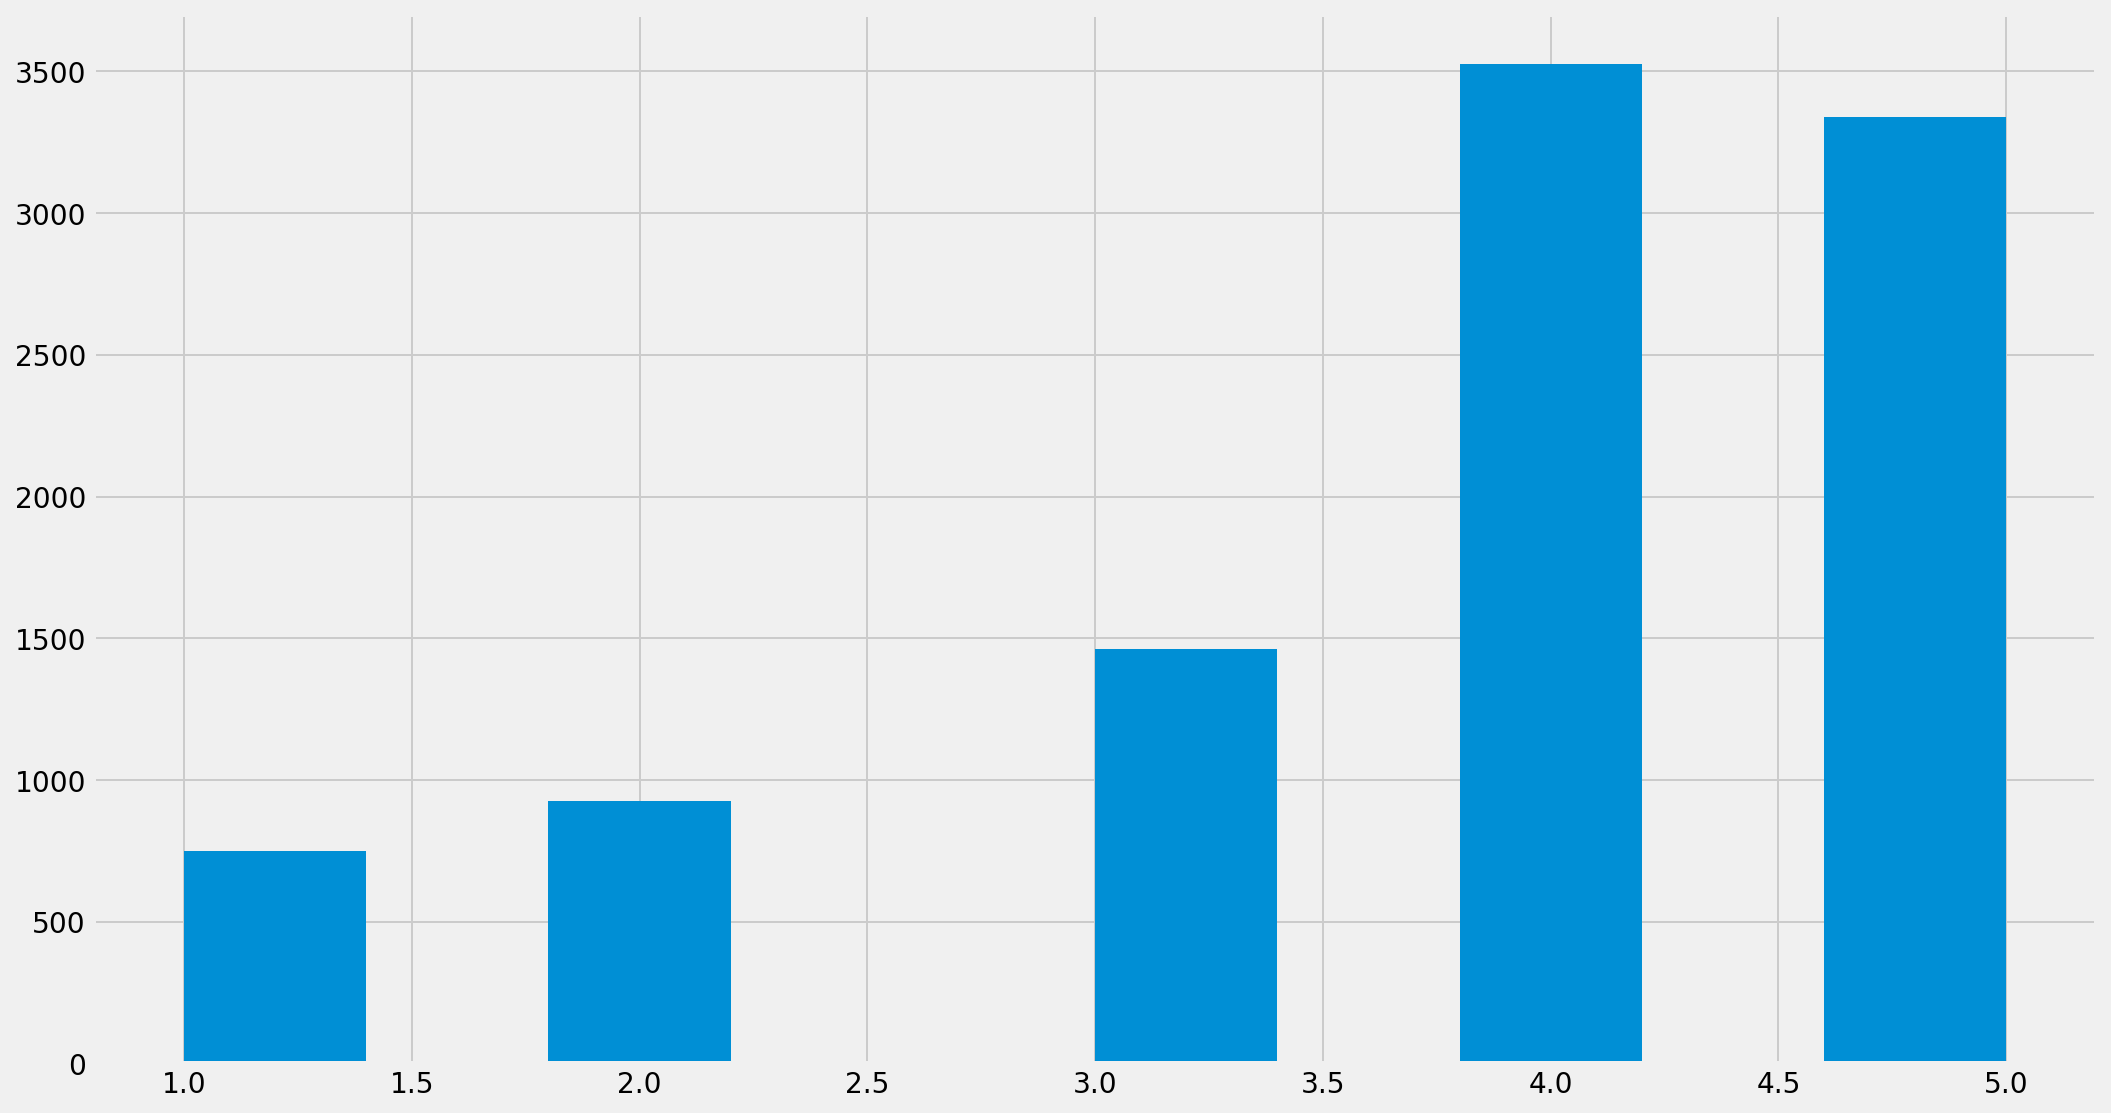

In [27]:
df.stars.hist()

In [28]:
df = df[(df['stars'] <=2) | (df['stars'] == 5)]
df = df.reset_index(drop=True)
len(df) 

5013

## 2.2 Creating the "blob" object for subsequent text analysis

🔶 Reference Code

> This is a demo code for your reference.\
> The patterns shown here are also useful for some of the subsequent tasks.\
> Create a new Column **"blob"** to store *blob* object from the **"text"** of each records

In [29]:
# Alternative 1: Using .apply() 
def create_blob(row):
    comment_text = row['text']
    blob_object = TextBlob(comment_text)
    return blob_object

df['blob'] = df.apply(create_blob, axis=1)

In [30]:
# Alternative 2 (for reference): Using .map() and lambda
df['blob'] = df['text'].map(TextBlob)

## 2.3 Understand the Texts - Exploratory Data Analysis


🔷**TASK**

> Create a new Column **"charc_count"** to store the number of characters in the **"text"**.\
> For this task, do count empty space as a character.\
> 💡hint: you don't need to use blob (or TextBlob) for this task.

In [ ]:
df['charc_count'] = <..>

In [ ]:
df['charc_count'].hist(bins=100)


🔷**TASK**

> Create a new Column "words_count" to store the number of words in the **"text"**
>
> 💡hint: you may use **.words** property from the blob objects stored in your current df.\
>   You can also safely assume words are separated by a space in between.

In [ ]:
df['words_count'] = <..>

In [ ]:
df['words_count'].hist(bins=100)

## 2.4 Sentiment Analysis 


🔷**TASK**

> Create two new columns:
>> A) **"senti_label"** - to store the either "negative", "neutral", or "positve" for the comment in  **"text"** column. 
        >>> - 0 = Neutral
        >>> - larger than 0 = Positive
        >>> - smaller than 0 = Negative
        
>> B) **"senti_score"** - to store the "polarity" for the comment in  **"text"** column.
    
> 💡hint: use **.sentiment.polarity** of the blob objects created in the current df.\
> You can create two different functions and used them with the .apply() method of a DataFrame.\
> OPTIONAL: Try to write one function (to be used wtih the .apply() method to achieve this if possible. You can also use any other method to create the two columns required.

In [ ]:
def insert_senti_label(row):
    <..>

df['senti_label'] = df.apply(insert_senti_label, axis=1)

In [ ]:
def insert_senti_score(row):
    <..>

df['senti_score'] = df.apply(insert_senti_score, axis=1)

## 2.5 Extracting Features for Descriptive Analysis

🔶 Reference Code

> This is a demo code for your reference.\
> The patterns shown here are also useful for some of the subsequent tasks.\

> Extract the **adjectives** from the **"text"** and create a DataFrame with the relevant info (see output).\
> 💡hint: you can use the "tags" property of the blob object.\
> The tags for "adjective" are "JJ", "JJR", "JJS". You can refer to the note of the week for full reference.

In [ ]:
# A custom function that will be plugged into the .apply() method
def get_adjective_list(row):
    df_adjective_partial = None
    data_for_each_new_row = []
    
    part_of_speech_tags = row['blob'].tags
    
    # Iterate through each of the Part of Speech Tags
    for word_tag_pair in part_of_speech_tags:
        word = word_tag_pair[0]  # first element is the word
        tag = word_tag_pair[1] # second element is the tag
        
        if tag in ['JJ', 'JJR', 'JJS']:
            # append the data related to this "adjective" word with other relevant fields
            # note: we append a dictionary
            data_for_each_new_row.append(
                {
                    'review_id': row['review_id'],
                    'stars': row['stars'], 
                    'senti_label': row['senti_label'], 
                    'senti_score': row['senti_score'],
                    'adjective': word.lower()
                }
            )
    # for each original row, create a DataFrame for its adjectives (1 adjective 1 row)
    df_adjective_partial = pd.DataFrame(data_for_each_new_row)
    return df_adjective_partial

# Use the .apply method, it return a Series of DataFrames (1 DataFrame per each row)
df_adjective = df.apply(get_adjective_list, axis=1)

# Concat the DataFrames into final DataFrame
df_adjective = pd.concat(list(df_adjective), axis=0, ignore_index=True)

In [ ]:
# Aggregating the key fields for each "adjetive" word
grp_adjective = df_adjective.groupby('adjective').agg({'review_id':'count', 'stars':'mean', 'senti_score':'mean'}).reset_index()
grp_adjective = grp_adjective.sort_values(['review_id'], axis=0, ascending=False)

In [ ]:
fig = px.scatter(grp_adjective.iloc[:101], x='senti_score', y='stars', size='review_id', text='adjective', color='senti_score', )

fig.update_layout(
    height=1080,
)

fig.show()

---


🔷**TASK**

> Extract the **Noun Phrases** from the **"text"** column into a new DataFrame **df_noun_phrases**.
> **Each of the Noun Phrase** should be in a single row.
> The new DataFrame should contains the follow fields:
> - review_id
> - stars
> - cools
> - useful
> - funny
> - senti_label
> - senti_score
> - noun_phrase

> 💡 hint: you can refer to the "Reference Code" in Section 2.5 of this Notebook

In [ ]:
def get_noun_phrases(row):
    <..>

df_noun_phrases = df.apply(<..>)

In [ ]:
df_noun_phrases = pd.concat(<..>)
df_noun_phrases.head(5)


🔷**TASK**

> Create an aggregated DataFrame **"grp_noun_phrases"** as shown in the screenshot below:
> - **noun_phrase**: column with unique noun_phrase 
> - **record_num**: number of reviews with this noun_phrase
> - **stars**: average of "stars" of those reviews with this noun_phrase
> - **useful**: average of "useful" of those reviews with this noun_phrase
> - **senti_score**: average of "senti_score" of those reviews with this noun_phrase

> 💡 hint: you can refer to the "Reference Code" in Section 2.5 of this Notebook

---
> 🖼️ Screenshot Below\
> ![](group.png)

---

In [ ]:
grp_noun_phrases = <..>

<..>
<..>
grp_noun_phrases.head(5)


🔷**TASK**

> Create a scatter plot that shows the top 100 most frequent noun_phrase
> - x-axis is the average "senti score"
> - y-axis is the average "stars"
> - size of each data points is presenting the number of records
> - color of each data points is presenting the avarage "useful"

> 📝 Insert your main Observations in the cell below

> 💡 hint: you can refer to the "Reference Code" in Section 2.5 of this Notebook

In [ ]:
# Insert 3 of your main Observations Here
<..>

In [ ]:
fig = px.scatter(<..>)

fig.update_layout(
    height=1080,
)

fig.show()



🔷**TASK**

> Create a scatter plot that shows the top 100 most frequent noun_phrase\
> This time, you are free to choose the column to be used for:
> - X and Y axes
> - Color and Size of Data Points


> 📝 Insert your main Observations in the cell below

> 💡 hint: you can refer to the "Reference Code" in Section 2.5 of this Notebook

In [ ]:
# Insert 3 of your main Observations Here
<..>

In [ ]:
fig = px.scatter(<..>)

fig.update_layout(
    height=1080,
)

fig.show()

## 2.6 Text Classification 

### 2.6.1 Preparing the Data for Classification

In [ ]:
# Alternative A:
def insert_adjectives_separated_by_comma(row):
    list_of_adjectives = []
    
    part_of_speech_tags = row['blob'].tags
    
    # Iterate through each of the Part of Speech Tags
    for word_tag_pair in part_of_speech_tags:
        word = word_tag_pair[0]  # first element is the word
        tag = word_tag_pair[1] # second element is the tag
        
        if tag in ['JJ', 'JJR', 'JJS']:
            list_of_adjectives.append(word)
    return ', '.join(list_of_adjectives)


df['adjectives'] = df.apply(insert_adjectives_separated_by_comma, axis=1)

In [ ]:
# Optional Challenge: Try to Figure out how this code works
# It works the same as Alternative A above
df['adjectives'] = df.blob.map(lambda x: ', '.join([p[0].lower() for p in x.tags if p[1] in ['JJ', 'JJR', 'JJS']]))

In [ ]:
# Prepareing the Target
df['target'] = df.stars >= 4
df['target'].value_counts()

### 2.6.2 Train the Classification Model using Scikit-Learn


🔷**TASK**

> Train a **"MultinomialNB"** classification model to predict the target.\
> Use the column "adjectives" as your input (X)


> 💡 hint: you can refer to **"NLP Project Overview"** and **"NLP Project Solutions"** in the Udemy Course.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
<..>

In [ ]:
# Use 20% of the dataset as test set
X_train, X_test, y_train, y_test = <..>

In [ ]:
# instantiate the model
nb = <..>

# train the model
<..>

# generate predictions
predictions = <..>

In [ ]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

### 2.6.3 Extra Contents: Train the Classification Model using TextBlob

In [ ]:
# TextBlob require the train and test datasets in such format:
# train = [
# ...     ('I love this sandwich.', 'pos'),
# ...     ('this is an amazing place!', 'pos'),
# ...     ('I feel very good about these beers.', 'pos'),
# ...     ('this is my best work.', 'pos'),
# ...     ("what an awesome view", 'pos'),
# ...     ('I do not like this restaurant', 'neg'),
# ...     ('I am tired of this stuff.', 'neg'),
# ...     ("I can't deal with this", 'neg'),
# ...     ('he is my sworn enemy!', 'neg'),
# ...     ('my boss is horrible.', 'neg')
# ... ]

# test = [
# ...     ('the beer was good.', 'pos'),
# ...     ('I do not enjoy my job', 'neg'),
# ...     ("I ain't feeling dandy today.", 'neg'),
# ...     ("I feel amazing!", 'pos'),
# ...     ('Gary is a friend of mine.', 'pos'),
# ...     ("I can't believe I'm doing this.", 'neg')
# ... ]

In [ ]:
# Use first 2000 rows for training; last 1000+ rows for testing
train = df.iloc[:2000].apply(lambda x: (x.adjectives, x.target), axis=1)
test = df.iloc[4000:].apply(lambda x: (x.adjectives, x.target), axis=1)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train)

In [ ]:
cl.classify("I will come back for sure. Taste great!")

In [ ]:
cl.accuracy(test)

In [ ]:
cl.show_informative_features(15)